In [112]:
nt_list = ["A", "T", "C", "G"]

#FACTOR = "SP1"; KMER = "CCAAT"
#FACTOR = "E2F4"; KMER="CCAAT"
#FACTOR = "NFYB"; KMER="ATGTG" # LTR12C
#FACTOR="FOS"; KMER="ATCGG"
FACTOR="SP1"; KMER="TTTTT"; #KMER="TGTGG"

In [113]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import numpy as np
import re

Populating the interactive namespace from numpy and matplotlib


In [114]:
# convert one-hot arrays to sequences
def convert_to_seq(seq_raw):
    seq_vec = np.array(seq_raw.split(","), dtype=int).reshape([1000,4])
    seq = ""
    for nt_arr in seq_vec:
        pos = np.where(nt_arr == 1)[0]
        if pos.shape[0] != 1:
            raise ValueError
        else:
            seq += nt_list[pos[0]]
    return seq

In [115]:
MAXCOUNT = 1000000
def find_kmer(TF_name, kmer):
    f_samples = "/storage/pandaman/project/AgentBind-GM12878-analysis/tmp/"\
                    + "%s+GM12878/seqs_one_hot_c/vis-samples/data.txt" %(TF_name)
    pos_stat = {}
    linecount = 0
    for line in open(f_samples):
        linecount += 1
        if linecount > MAXCOUNT:
            break
        seq_raw, label, info = line.split(";")
        try:
            seq = convert_to_seq(seq_raw)
        except: continue

        elems = info.strip().split(",")
        chromID, seq_start, seq_end, strand = elems[3], int(elems[6]), int(elems[7]) , elems[8]
        seq_start, seq_end = seq_start+1, seq_end+1 #0-based to 1-based
        
        # identify matched kmers
        matches = [m.start() for m in re.finditer('(?=%s)' %(kmer), seq)]
        
        # record the relative positions
        for m in matches:
            if m not in pos_stat:
                pos_stat[m] = 0
            pos_stat[m] += 1

        if strand == "-":
            matches = [1000-m-len(kmer) for m in matches]
            matches = matches[::-1]
        
        if len(matches) != 0:
            print_msg = "Sequence: %s:%d-%d %s\t" %(chromID, seq_start, seq_end, strand) +\
                  "Matched kmers start at: %s: " %(chromID) +\
                  (", ".join(["%d(%d)" %(m+seq_start, m) for m in matches]))
            
            # uncomment the following line to see all the positions of matches
            # print (print_msg)
        
    return pos_stat

In [116]:
pos_stat = find_kmer(FACTOR, KMER)

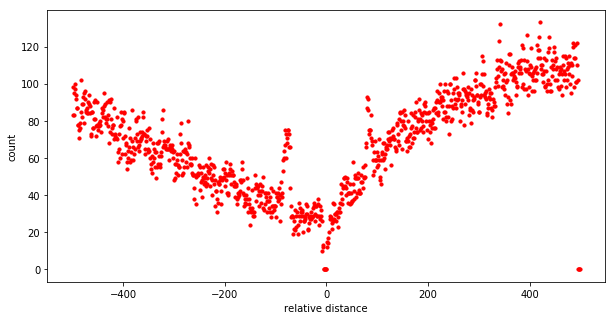

In [117]:
# plot the kmer distribution
for pos in range(1000):
    if pos not in pos_stat:
        pos_stat[pos] = 0

fig = plt.figure()
fig.set_size_inches((10, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("relative distance")
ax.set_ylabel("count")
ax.scatter([pos-500 for pos in range(1000)], [pos_stat[pos] for pos in range(1000)], c="r", s=10)
fig.savefig("Kmer_spatial_%s_%s.pdf"%(FACTOR,KMER))

In [118]:
sum([v for v in pos_stat.values()])

68843

In [119]:
pos_stat

{963: 105,
 977: 115,
 984: 104,
 574: 50,
 827: 86,
 726: 91,
 727: 93,
 728: 88,
 24: 96,
 241: 51,
 283: 42,
 480: 34,
 481: 29,
 482: 29,
 483: 38,
 484: 35,
 485: 24,
 486: 29,
 487: 27,
 488: 34,
 489: 32,
 490: 29,
 715: 84,
 849: 105,
 71: 91,
 134: 70,
 163: 63,
 314: 53,
 450: 31,
 451: 32,
 682: 92,
 760: 92,
 761: 95,
 821: 93,
 822: 95,
 823: 92,
 824: 87,
 825: 95,
 826: 82,
 828: 92,
 829: 88,
 830: 90,
 831: 98,
 832: 88,
 833: 103,
 834: 101,
 835: 108,
 836: 113,
 837: 104,
 838: 99,
 839: 109,
 840: 123,
 841: 132,
 842: 113,
 843: 107,
 844: 112,
 845: 98,
 230: 66,
 231: 60,
 287: 47,
 357: 31,
 947: 108,
 955: 102,
 744: 100,
 136: 74,
 137: 72,
 138: 85,
 139: 82,
 140: 73,
 141: 73,
 142: 65,
 143: 62,
 144: 72,
 145: 69,
 642: 67,
 643: 81,
 644: 85,
 685: 75,
 686: 84,
 692: 89,
 460: 35,
 97: 81,
 157: 52,
 773: 89,
 774: 95,
 232: 57,
 8: 87,
 9: 87,
 10: 78,
 211: 62,
 288: 46,
 289: 46,
 290: 50,
 291: 48,
 292: 35,
 293: 42,
 294: 48,
 295: 49,
 296: 49,
